In [1]:
import pandas as pd
import numpy as ny
import os
import matplotlib.pyplot as plt
import warnings
warnings. filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/91938/OneDrive/Desktop/Ruthu KAAR/Jupyter/american_vodkas.csv", parse_dates=['date'], index_col=['date'])

In [3]:
data.head()

,totalsellbylitre
date,
2016-01-09,25085.92
2016-02-09,9304.94
2016-03-09,16824.14
2016-06-09,16605.82
2016-07-09,22893.20


In [4]:
ts = data['totalsellbylitre'].resample('MS').sum()

In [5]:
ts.head()

date
2016-01-01    70580.09
2016-02-01    45942.10
2016-03-01    53729.54
2016-04-01    28477.32
2016-05-01    41718.62
Freq: MS, Name: totalsellbylitre, dtype: float64

<AxesSubplot:xlabel='date'>

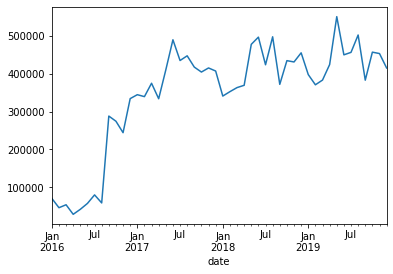

In [6]:
ts.plot()

In [7]:
import statsmodels.api as sm

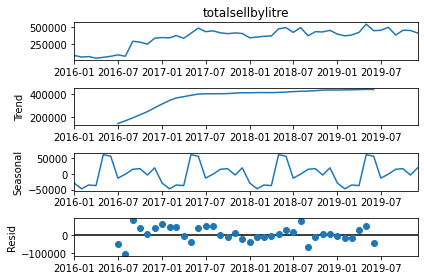

In [8]:
from unicodedata import decomposition


decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()


In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
adftest = adfuller(ts)
print("The pvalue of adfuller test is: ", adftest[1])

The pvalue of adfuller test is:  0.2328108656956966


In [11]:
ts.dropna(inplace=True)
len(ts)

48

In [37]:
train = ts[:42]
test = ts[42:]

In [38]:
len(train), (len(ts) - 1)

(42, 47)

In [39]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
model = ARIMA(train, order=(5, 0, 4)).fit()

c:\Users\91938\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [41]:
pred = model.predict(start = len(train), end = (len(ts) - 1))

In [42]:
pred.head()

2019-07-01    473457.189950
2019-08-01    486116.071160
2019-09-01    434386.538923
2019-10-01    463394.418121
2019-11-01    462649.147369
Freq: MS, dtype: float64

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
error = ny.sqrt(mean_squared_error(test, pred))
error

23653.88828187147

In [45]:
test.mean(), ny.sqrt(test.var())

(444534.875, 40918.90451908741)

<AxesSubplot:xlabel='date'>

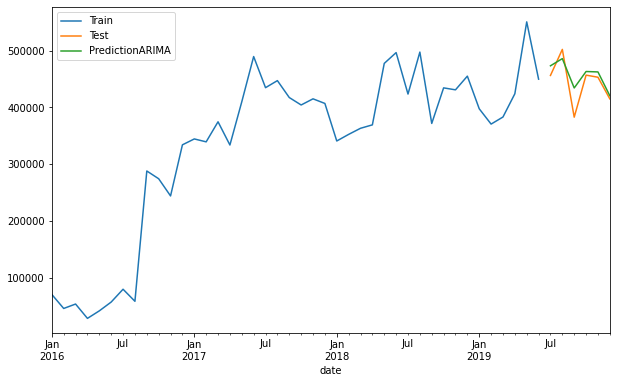

In [46]:
train.plot(legend = True, label = 'Train', figsize = (10, 6))
test.plot(legend = True, label = 'Test')
pred.plot(legend = True, label = 'PredictionARIMA')

In [47]:
final_model = ARIMA(ts, order = (5, 0, 4)).fit()

In [56]:
prediction = final_model.predict(len(ts), len(ts) + 10)

<AxesSubplot:xlabel='date'>

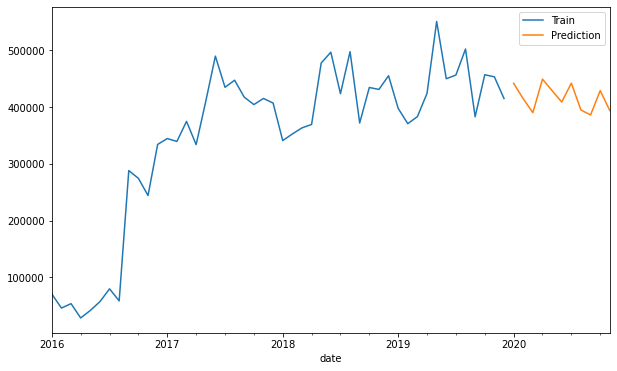

In [57]:
ts.plot(legend=True, label = 'Train', figsize = (10, 6))
prediction.plot(legend = True, label = 'Prediction')

In [58]:
prediction

2020-01-01    441846.602088
2020-02-01    414731.326109
2020-03-01    390219.410695
2020-04-01    449214.312170
2020-05-01    428985.747854
2020-06-01    408848.346664
2020-07-01    442178.765995
2020-08-01    394829.436946
2020-09-01    386169.569359
2020-10-01    429031.669751
2020-11-01    393746.464324
Freq: MS, dtype: float64